# PyLASCA
a tool for ...

## landmark detector
detect landmarks on a real color image for future coordinate transformation 

by

Sebastian Malkusch

2020-04-15

Institute for clinical pharmacology,

data science division,

Goethe-University Frankfurt,

Germany

malkusch@med.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

## Load libraries

In [1]:
from ipywidgets import interact
from pyLASCA.gui import landmarksWidgets
from pyLASCA.source import fileNames
from pyLASCA.source import landmarks
widgets = landmarksWidgets.LandmarksWidgets()
fn = fileNames.FileNames()
lm = landmarks.Landmarks()

PyLascaWidgets initialized


## Import
Load an rgb real color image on which landmarks are to be detected.

In [2]:
display(widgets.pathText, widgets.pathButton)

Text(value='', description='path to file', placeholder='enter a string', style=DescriptionStyle(description_wi…

Button(description='browse', icon='check', style=ButtonStyle(), tooltip='Click me')

Button(description='import', icon='check', style=ButtonStyle(), tooltip='Click me')

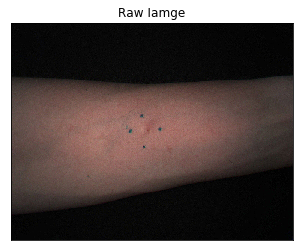

/Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 01/Tag 1/SCTCAPS 01 #1 15min (Colour).jpg


In [3]:
display(widgets.importButton)

def runImport(event):
    widgets.clearOutput()
    display(widgets.importButton)
    if(widgets.fileName):
        fn.fileName = widgets.fileName
        fn.splitFileName()
        lm.loadImage(fn.fileName)
        lm.drawImage()
        print(fn.fileName)
    
widgets.importButton.on_click(runImport)

## Analysis

BoundedFloatText(value=0.244, description='pxl size [mm]', max=200.0, step=0.1, style=DescriptionStyle(descrip…

BoundedFloatText(value=0.35, description='sigma', max=1.0, step=0.001, style=DescriptionStyle(description_widt…

FloatSlider(value=0.35, continuous_update=False, description='sigma', max=1.0, readout_format='.3f', step=0.00…

Button(description='analysis', icon='check', style=ButtonStyle(), tooltip='Click me')

Landmark coordinates:


,x_pxl,y_pxl,x_mm,y_mm
0,354.672515,332.181287,86.540094,81.052234
1,348.645646,248.792793,85.069538,60.705441
2,397.097701,284.778736,96.891839,69.486011
3,318.222222,290.706553,77.646222,70.932399


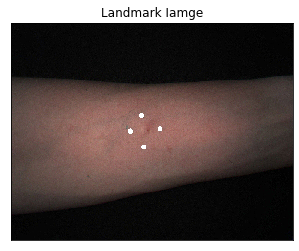

In [4]:
display(widgets.pxlSizeText, widgets.sigmaText, widgets.sigmaSlider, widgets.analysisButton)

def runAnalysis(event):
    widgets.clearOutput()
    display(widgets.pxlSizeText, widgets.sigmaText, widgets.sigmaSlider, widgets.analysisButton)
    if widgets.fileName:
        lm.pxlSize = widgets.pxlSizeText.value
        lm.sigma = widgets.sigmaText.value
        lm.detectContours()
        lm.detectLandmarks()
        widgets.landmarkSelector.options = lm.landmarkArray()
        widgets.landmarkSelector.value = -1
        print("Landmark coordinates:")
        display(lm.landmarks)
        lm.drawLandmarks(index = -1)

widgets.analysisButton.on_click(runAnalysis)

## Refinement

In [5]:
def updateImage(x):
    if widgets.fileName:
        lm.drawLandmarks(index = x)
        

interact(updateImage, x=widgets.landmarkSelector);

interactive(children=(Select(description='Select', options=(-1,), rows=1, value=-1), Output()), _dom_classes=(…

In [6]:
display(widgets.deleteButton)

def deleteLandmark(event):
    if (widgets.landmarkSelector.value != -1):
        lm.deleteContours(index = widgets.landmarkSelector.value)
        lm.detectLandmarks()
        widgets.landmarkSelector.options = lm.landmarkArray()
        widgets.landmarkSelector.value = -1

widgets.deleteButton.on_click(deleteLandmark)

Button(description='delete', icon='check', style=ButtonStyle(), tooltip='Click me')

## Save results

In [7]:
display(widgets.saveButton)

def saveLandmarks(event):
    widgets.clearOutput()
    display(widgets.saveButton)
    if (lm.countContours() > 2):
        try:
            lm.sortLandmarks()
        except ValueError:
            print("error, skip sorting.")
        fn.updateDateString()
        fn.supplementalInformation = "Landmarks"
        fn.suffix = "csv"
        fn.mergeFileName()
        lm.saveLandmarks(fileName = fn.outFileName)
    else:
        print("Wrong number of landmarks. Was %i, need to be 3 at least." %(lm.countContours()))

widgets.saveButton.on_click(saveLandmarks)

Button(description='save', icon='check', style=ButtonStyle(), tooltip='Click me')